In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import copy
import matplotlib.colors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

In [2]:
s01_umap = np.load("../Embeddings/s01_umap.npy")
s01_tsne = np.load("../Embeddings/s01_tsne.npy")
s01_pca = np.load("../Embeddings/s01_pca.npy")
s01_2layer = np.load("../Embeddings/s01_2layer.npy")
s01_6layer = np.load("../Embeddings/s01_6layer.npy")
s01_vae = np.load("../Embeddings/s01_vae.npy")
PopData = pd.read_csv("../SamusikData/population_assignments01.csv")
Assignments = np.array(PopData.Population)

In [3]:
s01_labels = PopData["Population"].to_numpy()
non_zero = np.where(s01_labels > 0)
s01_pca = s01_pca[non_zero]
s01_umap = s01_umap[non_zero]
s01_tsne = s01_tsne[non_zero]
s01_2layer = s01_2layer[non_zero]
s01_6layer = s01_6layer[non_zero]
s01_vae = s01_vae[non_zero]
y = Assignments[non_zero]

In [4]:
np.random.seed(1)

In [5]:
def run_crossval(X, y):
    cv = StratifiedKFold(n_splits=5)  

    accs = []
    mean_fpr = np.linspace(0, 1, 100)

    classifier = KNeighborsClassifier(n_neighbors = 5)
    for i, (train, test) in enumerate(cv.split(X, y)):
        X_train = np.array(X[train])
        X_test = np.array(X[test])
        y_train = np.array(y[train])
        y_test = np.array(y[test])

        classifier.fit(X_train, y_train)
        acc = metrics.accuracy_score(y_test, classifier.predict(X_test))
        print("Fold " + str(i+1) + ": " + str(acc))
        accs.append(acc)
    print("Mean Accuracy: " + str(np.mean(accs)))
    print("Accuracy SD: " + str(np.std(accs)))
    return np.mean(accs), np.std(accs)

### PCA Accuracy

In [6]:
X_pca = s01_pca[:,0:2]

In [7]:
mean_accs_pca, std_accs_pca = run_crossval(X_pca, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.6166431593794076
Fold 2: 0.6089327691584391
Fold 3: 0.6096850023507288
Fold 4: 0.6104006018431446
Fold 5: 0.6062629302238104
Mean Accuracy: 0.6103848925911061
Accuracy SD: 0.003427979945794184


### UMAP Accuracy

In [8]:
X_umap = s01_umap[:,0:2]

In [9]:
mean_accs_umap, std_accs_umap = run_crossval(X_umap, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.9505406676069582
Fold 2: 0.94950634696756
Fold 3: 0.9507287259050305
Fold 4: 0.9496896746285499
Fold 5: 0.9529810043257476
Mean Accuracy: 0.9506892838867692
Accuracy SD: 0.0012388852623069434


### tSNE Accuracy

In [10]:
X_tsne = s01_tsne[:,0:2]

In [11]:
mean_accs_tsne, std_accs_tsne = run_crossval(X_tsne, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.953267512929008
Fold 2: 0.9516690173953926
Fold 3: 0.9483779971791255
Fold 4: 0.9509121685160805
Fold 5: 0.953075042317096
Mean Accuracy: 0.9514603476673406
Accuracy SD: 0.0017730207592923223


### 2 Layer AE Accuracy

In [12]:
X_2layer = s01_2layer[:,0:2]

In [13]:
mean_accs_2layer, std_accs_2layer = run_crossval(X_2layer, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.6044193700047015
Fold 2: 0.5977433004231312
Fold 3: 0.5940761636107194
Fold 4: 0.6029716005266128
Fold 5: 0.598363738950536
Mean Accuracy: 0.5995148347031403
Accuracy SD: 0.0037428917930133576


### 6 Layer AE Accuracy

In [14]:
X_6layer = s01_6layer[:,0:2]

In [15]:
mean_accs_6layer, std_accs_6layer = run_crossval(X_6layer, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.892054536906441
Fold 2: 0.8961918194640338
Fold 3: 0.8921485660554772
Fold 4: 0.891009968027083
Fold 5: 0.8904457400789919
Mean Accuracy: 0.8923701261064053
Accuracy SD: 0.0020153072769328708


### VAE Accuracy

In [16]:
X_vae = s01_vae[:,0:2]

In [17]:
mean_accs_vae, std_accs_vae = run_crossval(X_vae, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.8744710860366713
Fold 2: 0.8757874941231781
Fold 3: 0.8730606488011283
Fold 4: 0.8771863832988528
Fold 5: 0.8757758134286252
Mean Accuracy: 0.8752562851376912
Accuracy SD: 0.001393895842144588


### Figure Generation

In [18]:
# Create lists for the plot
Methods = ['PCA', 'UMAP', 'tSNE', '2 Layer AE', '6 Layer AE', 'VAE']
x_pos = np.arange(len(Methods))
Means = [mean_accs_pca, mean_accs_umap, mean_accs_tsne, mean_accs_2layer, mean_accs_6layer, mean_accs_vae]
Errors = [std_accs_pca, std_accs_umap, std_accs_tsne, std_accs_2layer, std_accs_6layer, std_accs_vae]

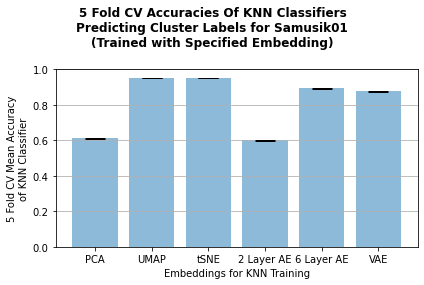

In [19]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, Means, yerr=Errors, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('5 Fold CV Mean Accuracy\nof KNN Classifier')
ax.set_xlabel('Embeddings for KNN Training')
ax.set_xticks(x_pos)
ax.set_xticklabels(Methods)
plt.suptitle('5 Fold CV Accuracies Of KNN Classifiers\nPredicting Cluster Labels for Samusik01\n(Trained with Specified Embedding)', fontweight = 'bold')
ax.yaxis.grid(True)
ax.set_ylim([0.0, 1.0])
# Save the figure and show
plt.tight_layout()
plt.savefig('../Figures/KNNClassiferAccuracies_s01.png')
plt.show()

# Levine

In [20]:
import FlowCal
data_dir = "../LevineData/"
levine_fn = data_dir + "Levine_32dim_notransform.fcs"
levine = FlowCal.io.FCSData(levine_fn)

labels = np.array(levine[:, 39])
labels[np.isnan(labels)] = 0
y = labels[labels > 0]
# Load other embeddings
levine_pca = np.load("../Embeddings/levine_pca.npy")
levine_tsne = np.load("../Embeddings/levine_tsne.npy")
levine_umap = np.load("../Embeddings/levine_umap.npy")
levine_2layer = np.load("../Embeddings/levine_2layer.npy")
levine_6layer = np.load("../Embeddings/levine_6layer.npy")
levine_vae = np.load("../Embeddings/levine_vae.npy")

## PCA Accuracy

In [21]:
X_pca = levine_pca[:,0:2]
mean_accs_pca, std_accs_pca = run_crossval(X_pca, np.array(y))

Fold 1: 0.6976052214810193
Fold 2: 0.7037481403273024
Fold 3: 0.7136823918990258
Fold 4: 0.7467485722512838
Fold 5: 0.749712036859282
Mean Accuracy: 0.7222992725635827
Accuracy SD: 0.021805591943600194


## UMAP Accuracy

In [22]:
X_umap = levine_umap[:,0:2]
mean_accs_umap, std_accs_umap = run_crossval(X_umap, np.array(y))

Fold 1: 0.9809953448193118
Fold 2: 0.9805154292844459
Fold 3: 0.9828670154052886
Fold 4: 0.9835388971541009
Fold 5: 0.9788827030140143
Mean Accuracy: 0.9813598779354324
Accuracy SD: 0.0016734372779746447


## tSNE Accuracy

In [23]:
X_tsne = levine_tsne[:,0:2]
mean_accs_tsne, std_accs_tsne = run_crossval(X_tsne, np.array(y))

Fold 1: 0.9782118347170898
Fold 2: 0.9790756826798483
Fold 3: 0.9811873110332582
Fold 4: 0.9828670154052886
Fold 5: 0.976531004031484
Mean Accuracy: 0.9795745695733938
Accuracy SD: 0.002227570883333026


## 2 Layer Accuracy

In [24]:
X_2layer = levine_2layer[:,0:2]
mean_accs_2layer, std_accs_2layer = run_crossval(X_2layer, np.array(y))

Fold 1: 0.6937179056486058
Fold 2: 0.6992849258530499
Fold 3: 0.7069155828574171
Fold 4: 0.7334549119354994
Fold 5: 0.7397293146477251
Mean Accuracy: 0.7146205281884594
Accuracy SD: 0.018529175260521072


## 6 Layer Accuracy

In [25]:
X_6layer = levine_6layer[:,0:2]
mean_accs_6layer, std_accs_6layer = run_crossval(X_6layer, np.array(y))

Fold 1: 0.9368431156116523
Fold 2: 0.9394826510534146
Fold 3: 0.9451456543648318
Fold 4: 0.9573355089504247
Fold 5: 0.9523421002111729
Mean Accuracy: 0.9462298060382992
Accuracy SD: 0.0076877333413039204


## VAE

In [26]:
X_vae = levine_vae[:,0:2]
mean_accs_vae, std_accs_vae = run_crossval(X_vae, np.array(y))

Fold 1: 0.9638143686711139
Fold 2: 0.965782022364064
Fold 3: 0.966693861880309
Fold 4: 0.9732687047079714
Fold 5: 0.9644365521213285
Mean Accuracy: 0.9667991019489574
Accuracy SD: 0.0033879657802697435


In [27]:
# Create lists for the plot
Methods = ['PCA', 'UMAP', 'tSNE', '2 Layer AE', '6 Layer AE', 'VAE']
x_pos = np.arange(len(Methods))
Means = [mean_accs_pca, mean_accs_umap, mean_accs_tsne, mean_accs_2layer, mean_accs_6layer, mean_accs_vae]
Errors = [std_accs_pca, std_accs_umap, std_accs_tsne, std_accs_2layer, std_accs_6layer, std_accs_vae]

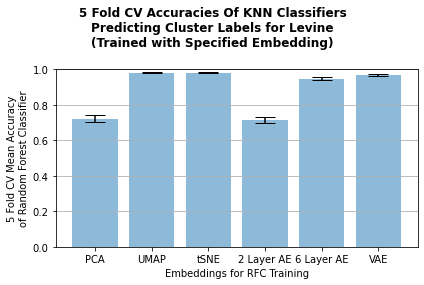

In [29]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, Means, yerr=Errors, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('5 Fold CV Mean Accuracy\nof Random Forest Classifier')
ax.set_xlabel('Embeddings for RFC Training')
ax.set_xticks(x_pos)
ax.set_xticklabels(Methods)
plt.suptitle('5 Fold CV Accuracies Of KNN Classifiers\nPredicting Cluster Labels for Levine\n(Trained with Specified Embedding)', fontweight = 'bold')
ax.yaxis.grid(True)
ax.set_ylim([0.0, 1.0])
# Save the figure and show
plt.tight_layout()
plt.savefig('../Figures/KNNClassiferAccuracies_levine.png')
plt.show()